In [1]:
import pandas as pd

Nulls durch merge

In [2]:
chefmozparking = pd.read_csv('../Data/chefmozparking.csv')
chefmozrating = pd.read_csv('../Data/rating_final.csv')

In [3]:
set(chefmozparking.placeID.unique()) - set(chefmozrating.placeID.unique())

{132012,
 132023,
 132024,
 132026,
 132030,
 132031,
 132107,
 132111,
 132155,
 132157,
 132159,
 132160,
 132161,
 132164,
 132177,
 132182,
 132184,
 132204,
 132206,
 132207,
 132220,
 132231,
 132237,
 132243,
 132281,
 132289,
 132292,
 132296,
 132297,
 132302,
 132326,
 132333,
 132355,
 132377,
 132392,
 132396,
 132399,
 132409,
 132436,
 132437,
 132439,
 132442,
 132443,
 132449,
 132468,
 132478,
 132479,
 132481,
 132482,
 132483,
 132484,
 132487,
 132491,
 132521,
 132527,
 132530,
 132531,
 132535,
 132545,
 132557,
 132562,
 132563,
 132565,
 132566,
 132567,
 132568,
 132569,
 132570,
 132571,
 132573,
 132574,
 132575,
 132576,
 132577,
 132578,
 132579,
 132580,
 132581,
 132582,
 132585,
 132586,
 132587,
 132588,
 132589,
 132590,
 132591,
 132592,
 132593,
 132595,
 132596,
 132597,
 132598,
 132599,
 132600,
 132601,
 132602,
 132603,
 132604,
 132605,
 132606,
 132607,
 132610,
 132611,
 132612,
 132614,
 132615,
 132616,
 132617,
 132618,
 132619,
 132620,
 

In [4]:
merged = chefmozparking.merge(
    chefmozrating,
    how='left',
    left_on='placeID',
    right_on='placeID'
)

In [5]:
merged[merged.rating.isna()]

,placeID,parking_lot,userID,rating,food_rating,service_rating
0,135111,public,NaN,NaN,NaN,NaN
1,135110,none,NaN,NaN,NaN,NaN
17,135107,none,NaN,NaN,NaN,NaN
28,135105,none,NaN,NaN,NaN,NaN
36,135103,valet parking,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1728,132024,street,NaN,NaN,NaN,NaN
1729,132023,fee,NaN,NaN,NaN,NaN
1730,132023,public,NaN,NaN,NaN,NaN
1731,132012,public,NaN,NaN,NaN,NaN


Fehlende Werte im Ames Datensatz

In [6]:
ames = pd.read_csv('../Data/AmesHousing.csv')

<Axes: xlabel='Alley', ylabel='Count'>

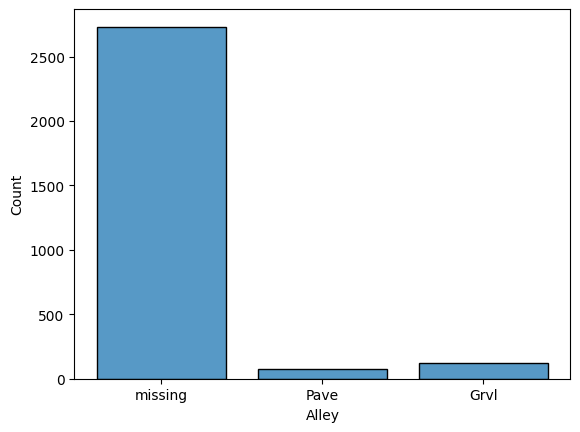

In [7]:
import seaborn as sns
sns.histplot(
    ames.Alley.fillna('missing'),
    shrink=.8,
)

In [8]:
ames[['Alley']].groupby(
    'Alley',
    dropna=False
).size()/ames.Alley.shape

Alley
Grvl    0.040956
Pave    0.026621
NaN     0.932423
dtype: float64

In [9]:
ames['Alley'].fillna('no alley')

0       no alley
1       no alley
2       no alley
3       no alley
4       no alley
          ...   
2925    no alley
2926    no alley
2927    no alley
2928    no alley
2929    no alley
Name: Alley, Length: 2930, dtype: object

Visualizing missing values

In [10]:
scat = pd.read_csv(
    '../Data/scat.csv'
)
scat.drop(columns='Unnamed: 0', inplace=True)

In [11]:
missing_values = scat.isnull()
missing_values

,Species,Month,Year,Site,Location,Age,Number,Length,Diameter,Taper,TI,Mass,d13C,d15N,CN,ropey,segmented,flat,scrape
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


([], [])

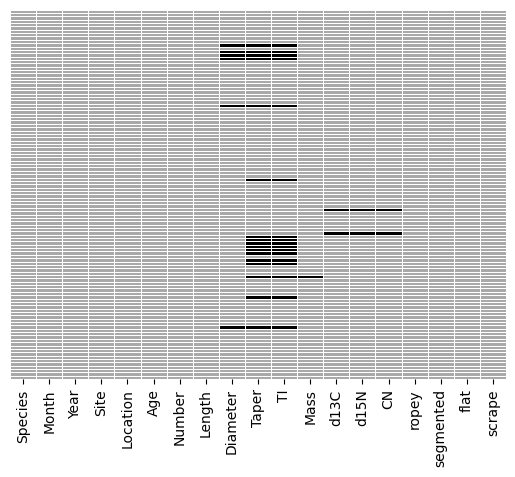

In [12]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['darkgrey', 'black'])
sns.heatmap(
    missing_values,
    cbar=False,
    cmap=cmap,
    linewidths=0.5
)
plt.yticks([])

In [13]:
cols_missing_values = [col for col in missing_values.columns if missing_values[col].any()]
cols_missing_values

['Diameter', 'Taper', 'TI', 'Mass', 'd13C', 'd15N', 'CN']

In [14]:
missing_values = scat.isnull()
co_occurrence = missing_values[cols_missing_values].groupby(cols_missing_values).size()
co_occurrence = co_occurrence.reset_index()
co_occurrence.columns = cols_missing_values + ['size']
co_occurrence


,Diameter,Taper,TI,Mass,d13C,d15N,CN,size
0,False,False,False,False,False,False,False,91
1,False,False,False,False,True,True,True,2
2,False,True,True,False,False,False,False,10
3,False,True,True,True,False,False,False,1
4,True,True,True,False,False,False,False,6


In [15]:
co_occurrence = co_occurrence[
    co_occurrence[cols_missing_values].any(axis=1)
]

In [16]:
co_occurrence

,Diameter,Taper,TI,Mass,d13C,d15N,CN,size
1,False,False,False,False,True,True,True,2
2,False,True,True,False,False,False,False,10
3,False,True,True,True,False,False,False,1
4,True,True,True,False,False,False,False,6


In [17]:
labels = []
for index, row in co_occurrence.iterrows():
    valid_columns = [column for column, value in row.items() if value]
    valid_columns.pop()
    labels.append('_'.join(valid_columns))
labels



['d13C_d15N_CN', 'Taper_TI', 'Taper_TI_Mass', 'Diameter_Taper_TI']

In [18]:
co_occurrence['labels'] = labels

/var/folders/g0/jwbp_psj72l2k31ddg94tmm80000gn/T/ipykernel_78748/3384981296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co_occurrence['labels'] = labels


In [19]:
co_occurrence = co_occurrence.sort_values(
    by='size',
    ascending=False
)

In [20]:
co_occurrence

,Diameter,Taper,TI,Mass,d13C,d15N,CN,size,labels
2,False,True,True,False,False,False,False,10,Taper_TI
4,True,True,True,False,False,False,False,6,Diameter_Taper_TI
1,False,False,False,False,True,True,True,2,d13C_d15N_CN
3,False,True,True,True,False,False,False,1,Taper_TI_Mass


<Axes: xlabel='labels', ylabel='size'>

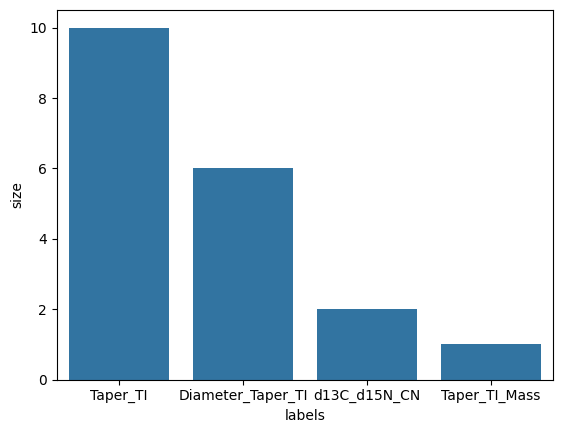

In [21]:
sns.barplot(
    x = co_occurrence['labels'],
    y = co_occurrence['size']
)

Scatterplot für fehlende Werte

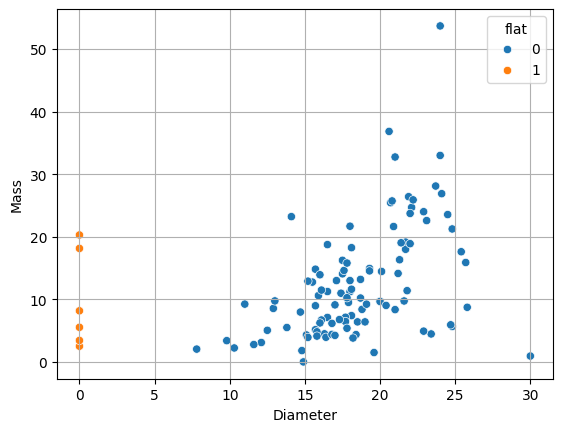

In [22]:
scat_filled = scat.copy()
scat_filled = scat_filled.fillna(0)
sns.scatterplot(
    x=scat_filled.Diameter,
    y=scat_filled.Mass,
    hue=scat_filled.flat
)
plt.grid()

PCA for missing values

In [1]:
import pandas as pd

In [2]:
chicago_raw = pd.read_parquet('chicago_train_data.parquet')

In [3]:
chicago_raw

,Austin (Blue Line),Harlem/Lake (Green Line),Pulaski (Green Line),"Quincy/Wells (Brown, Orange, Purple & Pink Lines)",Davis (Purple Line),Belmont (Blue Line),Jackson (Blue Line),Sheridan (Red Line),Damen (Brown Line),Morse (Red Line),...,Irving Park (Brown Line),Western (Brown Line),Harrison (Red Line),Montrose (Brown Line),Morgan (Green & Pink Lines),Homan (Green Line),Lake (Red Line),Conservatory (Green Line),Oakton-Skokie (Yellow Line),Cermak-McCormick Place (Green Line)
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,0.290,0.633,0.483,0.374,0.804,1.165,0.649,1.116,0.411,1.698,...,0.327,0.715,0.502,0.338,NaN,NaN,2.942,NaN,NaN,NaN
2001-01-02,1.240,2.950,1.230,7.737,3.199,4.046,5.777,3.854,1.823,3.807,...,2.040,3.194,2.390,1.710,NaN,NaN,12.087,NaN,NaN,NaN
2001-01-03,1.412,3.107,1.394,8.051,3.476,4.153,6.482,4.147,1.905,4.047,...,2.124,3.272,2.495,1.888,NaN,NaN,12.622,NaN,NaN,NaN
2001-01-04,1.388,3.259,1.370,8.027,3.540,4.362,6.766,4.202,2.008,4.107,...,2.246,3.398,2.531,1.905,NaN,NaN,12.936,NaN,NaN,NaN
2001-01-05,1.465,3.357,1.453,7.653,3.684,4.400,6.308,4.404,2.088,4.381,...,2.362,3.346,2.202,2.049,NaN,NaN,13.043,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-07,2.307,3.848,1.487,8.473,3.555,5.879,8.275,5.859,3.230,5.009,...,3.350,4.237,4.977,2.939,2.792,NaN,21.987,1.028,1.037,1.421
2016-09-08,2.318,4.036,1.491,8.430,3.874,6.024,8.581,6.109,3.307,5.161,...,3.358,4.348,5.050,3.011,2.830,NaN,22.631,1.077,1.081,1.449
2016-09-09,2.267,4.056,1.581,7.866,3.712,5.925,7.427,5.978,3.191,5.123,...,3.314,4.561,4.900,2.954,2.798,NaN,21.927,1.017,0.966,1.500


In [5]:
columns_with_na_values = chicago_raw.columns[chicago_raw.isna().any()].tolist()
columns_with_na_values

['Sox-35th (Red Line)',
 '79th (Red Line)',
 '95th/Dan Ryan (Red Line)',
 'Washington (Red Line)',
 '63rd (Red Line)',
 '69th (Red Line)',
 'Cermak-Chinatown (Red Line)',
 'Garfield (Red Line)',
 '47th (Red Line)',
 '87th (Red Line)',
 'Morgan (Green & Pink Lines)',
 'Homan (Green Line)',
 'Conservatory (Green Line)',
 'Oakton-Skokie (Yellow Line)',
 'Cermak-McCormick Place (Green Line)']

In [7]:
masked_chicago_raw_data = (chicago_raw.isna()).astype(int)
masked_chicago_raw_data

,Austin (Blue Line),Harlem/Lake (Green Line),Pulaski (Green Line),"Quincy/Wells (Brown, Orange, Purple & Pink Lines)",Davis (Purple Line),Belmont (Blue Line),Jackson (Blue Line),Sheridan (Red Line),Damen (Brown Line),Morse (Red Line),...,Irving Park (Brown Line),Western (Brown Line),Harrison (Red Line),Montrose (Brown Line),Morgan (Green & Pink Lines),Homan (Green Line),Lake (Red Line),Conservatory (Green Line),Oakton-Skokie (Yellow Line),Cermak-McCormick Place (Green Line)
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,1,1
2001-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,1,1
2001-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,1,1
2001-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,1,1
2001-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2016-09-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2016-09-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [8]:
percentage_missing_per_date = masked_chicago_raw_data.sum(axis=1) / masked_chicago_raw_data.shape[1]

In [16]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
pca_masked_chicago_raw_data = pca.fit_transform(masked_chicago_raw_data)

<Axes: >

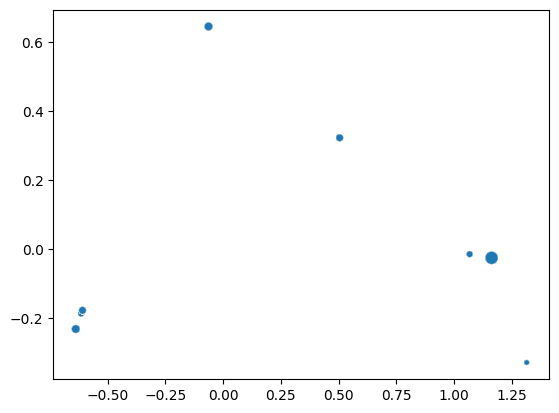

In [17]:
sns.scatterplot(
    x = pca_masked_chicago_raw_data[:, 0],
    y = pca_masked_chicago_raw_data[:, 1],
    alpha=0.4,
    s = percentage_missing_per_date*1000
)

In [14]:
transposed_masked_chicago_raw_data = masked_chicago_raw_data.T

In [15]:
transposed_masked_chicago_raw_data

date,2001-01-01,2001-01-02,2001-01-03,2001-01-04,2001-01-05,2001-01-06,2001-01-07,2001-01-08,2001-01-09,2001-01-10,...,2016-09-02,2016-09-03,2016-09-04,2016-09-05,2016-09-06,2016-09-07,2016-09-08,2016-09-09,2016-09-10,2016-09-11
Austin (Blue Line),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Harlem/Lake (Green Line),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Pulaski (Green Line),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Quincy/Wells (Brown, Orange, Purple & Pink Lines)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Davis (Purple Line),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Homan (Green Line),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Lake (Red Line),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Conservatory (Green Line),1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Oakton-Skokie (Yellow Line),1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
percentage_missing_per_station = transposed_masked_chicago_raw_data.sum(axis=1) / transposed_masked_chicago_raw_data.shape[1]
percentage_missing_per_station

Austin (Blue Line)                                   0.000000
Harlem/Lake (Green Line)                             0.000000
Pulaski (Green Line)                                 0.000000
Quincy/Wells (Brown, Orange, Purple & Pink Lines)    0.000000
Davis (Purple Line)                                  0.000000
                                                       ...   
Homan (Green Line)                                   0.994593
Lake (Red Line)                                      0.000000
Conservatory (Green Line)                            0.026339
Oakton-Skokie (Yellow Line)                          0.716553
Cermak-McCormick Place (Green Line)                  0.891854
Length: 146, dtype: float64

In [18]:
pca_transposed = pca.fit_transform(transposed_masked_chicago_raw_data)

<Axes: >

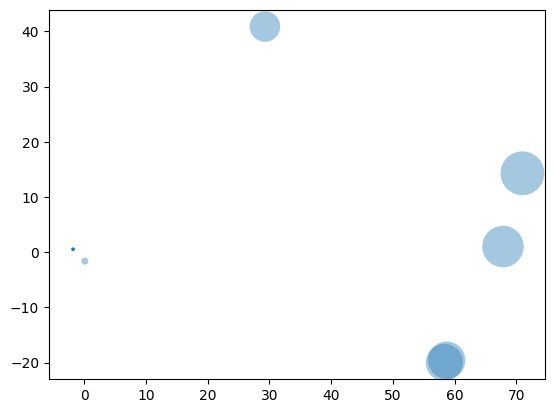

In [21]:
sns.scatterplot(
    x = pca_transposed[:, 0],
    y = pca_transposed[:, 1],
    alpha=0.4,
    s = percentage_missing_per_station*1000
)

<Axes: xlabel='date'>

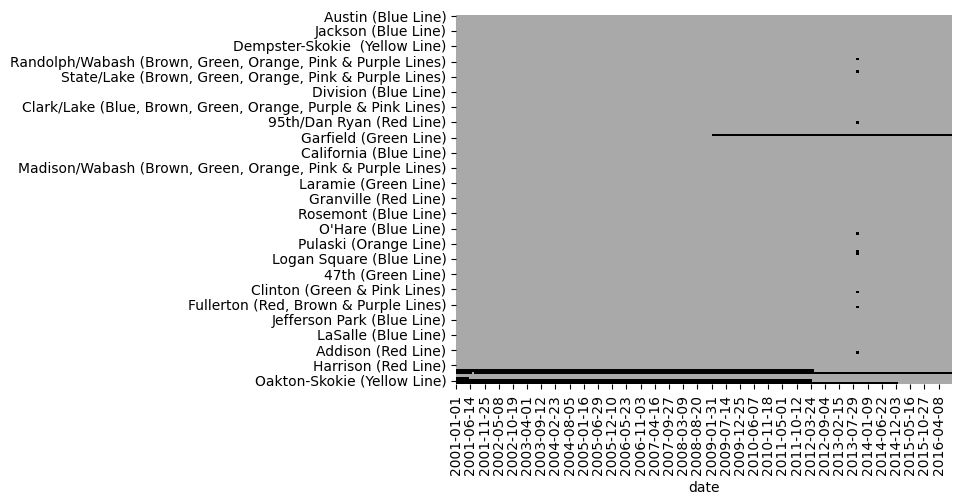

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['darkgrey', 'black'])
sns.heatmap(
    chicago_raw.isna().T,
    cbar=False,
    cmap=cmap,
    #linewidths=0.5
)

Baseline Model

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dtc = DecisionTreeClassifier(max_depth=4)

In [37]:
scat.columns

Index(['Species', 'Month', 'Year', 'Site', 'Location', 'Age', 'Number',
       'Length', 'Diameter', 'Taper', 'TI', 'Mass', 'd13C', 'd15N', 'CN',
       'ropey', 'segmented', 'flat', 'scrape'],
      dtype='object')

In [38]:
predictor_columns = [
    "Age",
    "Number",
    "Length",
    "Diameter",
    "Taper",
    "TI",
    "Mass",
    "d13C",
    "d15N",
    "CN",
    "ropey",
    "segmented",
    "flat",
    "scrape",
]
target = "Species"

In [39]:
X = scat[predictor_columns]
y = scat[target]

In [40]:
dtc.fit(X,y)

DecisionTreeClassifier(max_depth=4)

[Text(0.5131578947368421, 0.9, 'x[9] <= 8.7\ngini = 0.615\nsamples = 110\nvalue = [57, 28, 25]'),
 Text(0.2631578947368421, 0.7, 'x[8] <= 11.78\ngini = 0.517\nsamples = 83\nvalue = [55, 18, 10]'),
 Text(0.21052631578947367, 0.5, 'x[6] <= 5.1\ngini = 0.492\nsamples = 74\nvalue = [55, 9, 10]'),
 Text(0.10526315789473684, 0.3, 'x[3] <= 16.1\ngini = 0.602\nsamples = 14\nvalue = [5, 2, 7]'),
 Text(0.05263157894736842, 0.1, 'gini = 0.163\nsamples = 7\nvalue = [1, 2, 4]'),
 Text(0.15789473684210525, 0.1, 'gini = 0.245\nsamples = 7\nvalue = [4, 0, 3]'),
 Text(0.3157894736842105, 0.3, 'x[7] <= -27.0\ngini = 0.289\nsamples = 60\nvalue = [50, 7, 3]'),
 Text(0.2631578947368421, 0.1, 'gini = 0.218\nsamples = 44\nvalue = [41, 2, 1]'),
 Text(0.3684210526315789, 0.1, 'gini = 0.54\nsamples = 16\nvalue = [9, 5, 2]'),
 Text(0.3157894736842105, 0.5, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(0.7631578947368421, 0.7, 'x[2] <= 11.25\ngini = 0.563\nsamples = 27\nvalue = [2, 10, 15]'),
 Text(0.63157

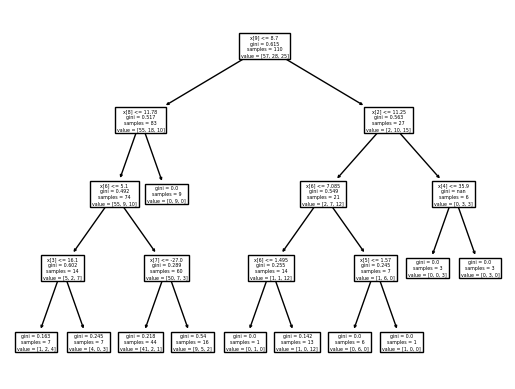

In [41]:
plot_tree(dtc)

Deleting null values

In [42]:
chicago_raw.shape

(5733, 146)

In [43]:
chicago_raw.isna().astype(int).sum(axis='rows').sort_values(ascending=False).head(10)

Homan (Green Line)                     5702
Cermak-McCormick Place (Green Line)    5113
Morgan (Green & Pink Lines)            4138
Oakton-Skokie (Yellow Line)            4108
Washington (Red Line)                  2780
Conservatory (Green Line)               151
Cermak-Chinatown (Red Line)              30
79th (Red Line)                          30
95th/Dan Ryan (Red Line)                 30
Sox-35th (Red Line)                      30
dtype: int64

<Axes: xlabel='date'>

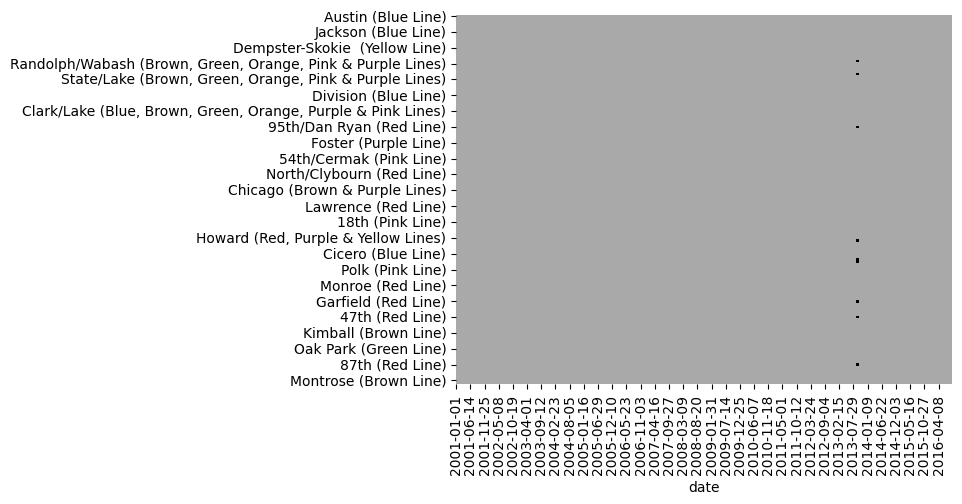

In [44]:
cmap = ListedColormap(['darkgrey', 'black'])
sns.heatmap(
    chicago_raw.dropna(
        axis='columns',
        thresh=5733-30).isna().T,
    cbar=False,
    cmap=cmap,
    #linewidths=0.5
)

Impute with global mean

In [49]:
indices_of_missing = chicago_raw[chicago_raw['87th (Red Line)'].isna()].index.tolist()

In [50]:
chicago_raw_nona = chicago_raw.dropna(
    axis='columns',
    thresh=5733-30
)
chicago_raw_nona.mean().mean()

3.301028425856202

<Axes: xlabel='date'>

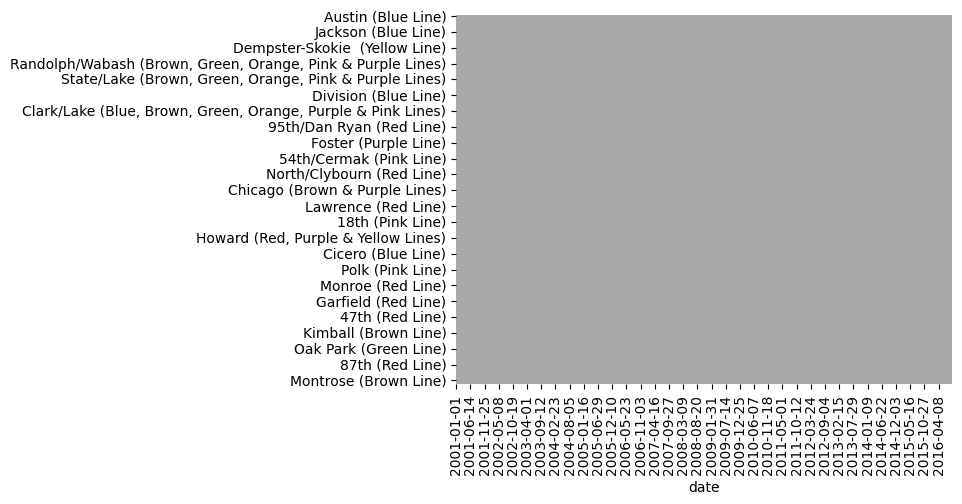

In [51]:
from sklearn.impute import SimpleImputer
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['darkgrey', 'black'])
chicago_raw_nona = chicago_raw.dropna(
    axis='columns',
    thresh=5733-30
)

imp_constant = SimpleImputer(
    missing_values=pd.NA,
    strategy='constant',
    fill_value=chicago_raw_nona.mean().mean()
)
chicago_raw_nona = pd.DataFrame(
    imp_constant.fit_transform(chicago_raw_nona),
    columns = chicago_raw_nona.columns,
    index=chicago_raw_nona.index
)
sns.heatmap(
    chicago_raw_nona.isna().T,
    cbar=False,
    cmap=cmap,
    #linewidths=0.5
)

In [52]:
chicago_raw.loc[indices_of_missing[0], '87th (Red Line)']

nan

In [53]:
chicago_raw_nona.loc[indices_of_missing[0], '87th (Red Line)']

3.301028425856202

<Axes: xlabel='date'>

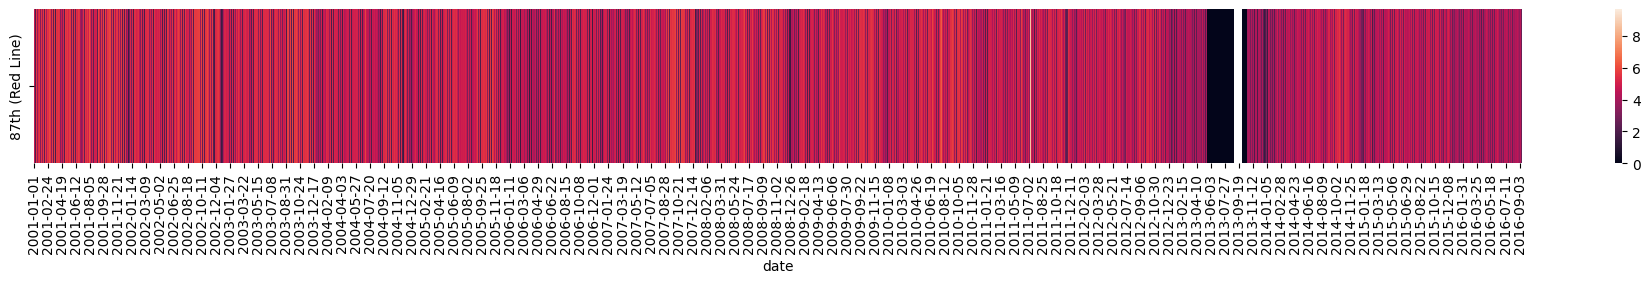

In [54]:
plt.figure(figsize=(24, 2))
sns.heatmap(
    chicago_raw[['87th (Red Line)']].T,
    #linewidths=0.5
)


<Axes: xlabel='date'>

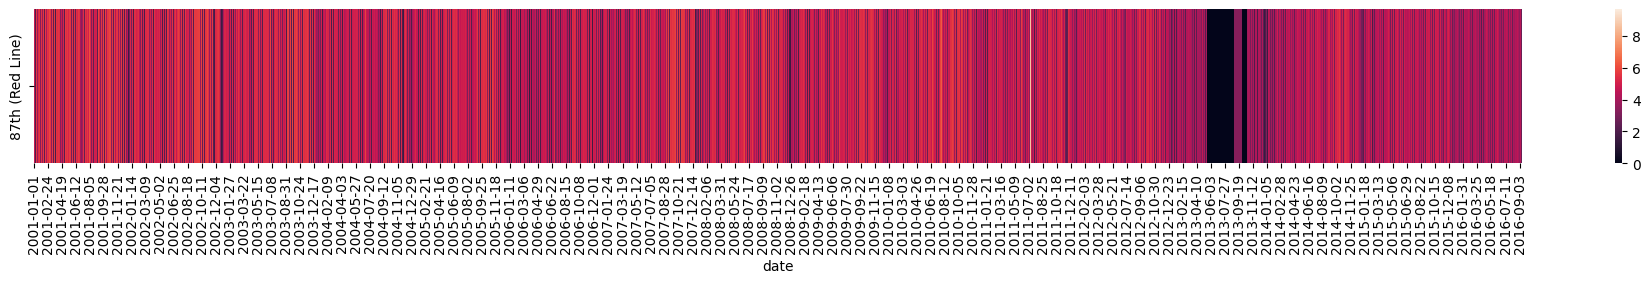

In [55]:
plt.figure(figsize=(24, 2))

sns.heatmap(
    chicago_raw_nona[['87th (Red Line)']].T,
    #linewidths=0.5
)


Impute with concept most common

<Axes: xlabel='date'>

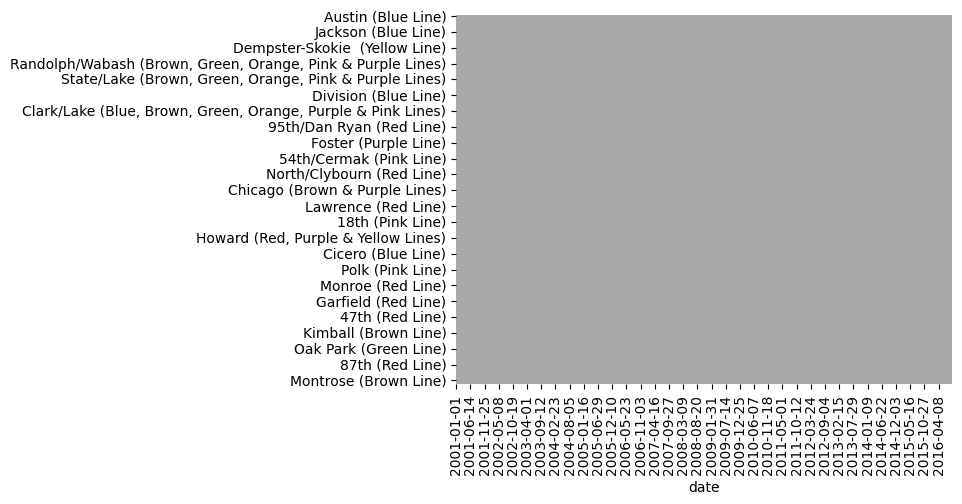

In [198]:

from sklearn.impute import SimpleImputer
chicago_raw_nona = chicago_raw.dropna(
    axis='columns',
    thresh=5733-30
)
imp_mean = SimpleImputer(
    missing_values=pd.NA,
    strategy='mean'
)
chicago_raw_nona = pd.DataFrame(
    imp_mean.fit_transform(chicago_raw_nona),
    columns = chicago_raw_nona.columns,
    index=chicago_raw_nona.index
)
sns.heatmap(
    chicago_raw_nona.isna().T,
    cbar=False,
    cmap=cmap,
    #linewidths=0.5
)

<Axes: xlabel='date'>

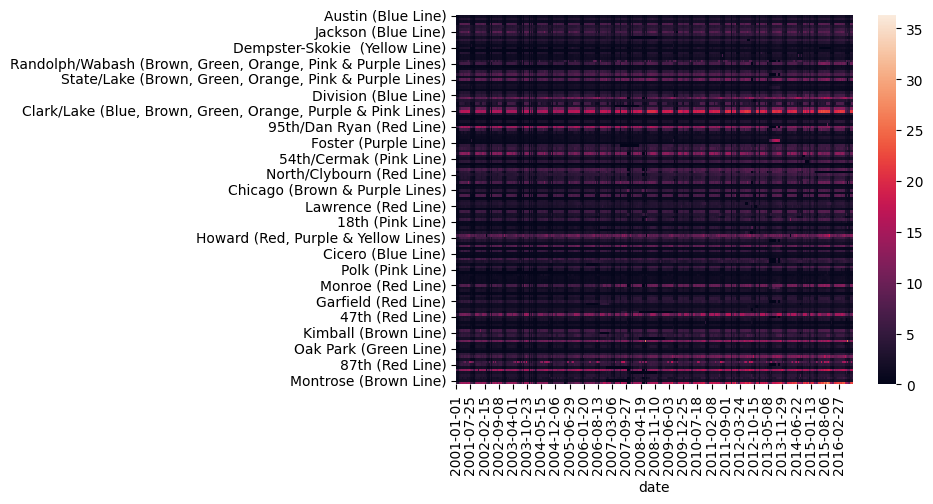

In [199]:
sns.heatmap(
    chicago_raw_nona.T
)

<Axes: xlabel='date'>

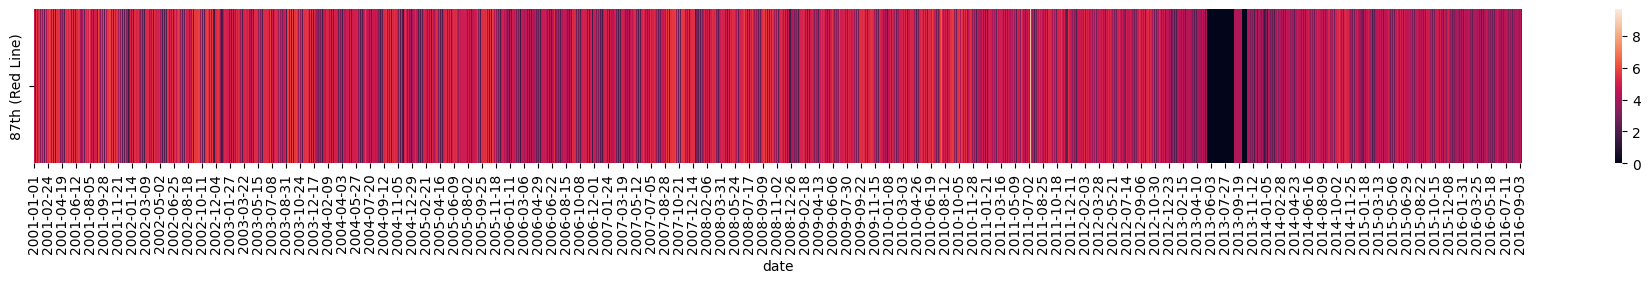

In [200]:
plt.figure(figsize=(24, 2))

sns.heatmap(
    chicago_raw_nona[['87th (Red Line)']].T,
)


<Axes: xlabel='date'>

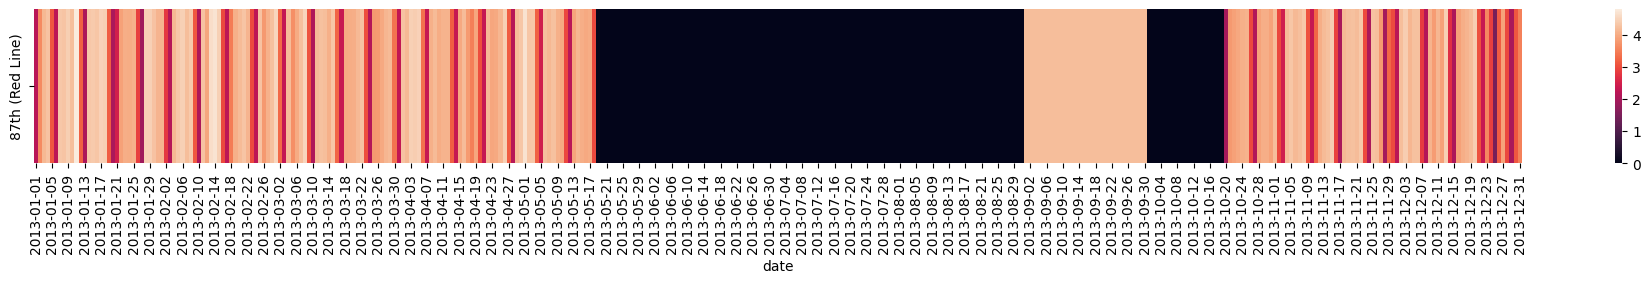

In [201]:
plt.figure(figsize=(24, 2))

sns.heatmap(
    pd.DataFrame(chicago_raw_nona.loc['2013-01-01':'2013-12-31', '87th (Red Line)']).T
)


In [202]:
chicago_raw_nona.loc[indices_of_missing[2], '87th (Red Line)']

4.2144198667368045

KNN Imputation

<Axes: xlabel='date'>

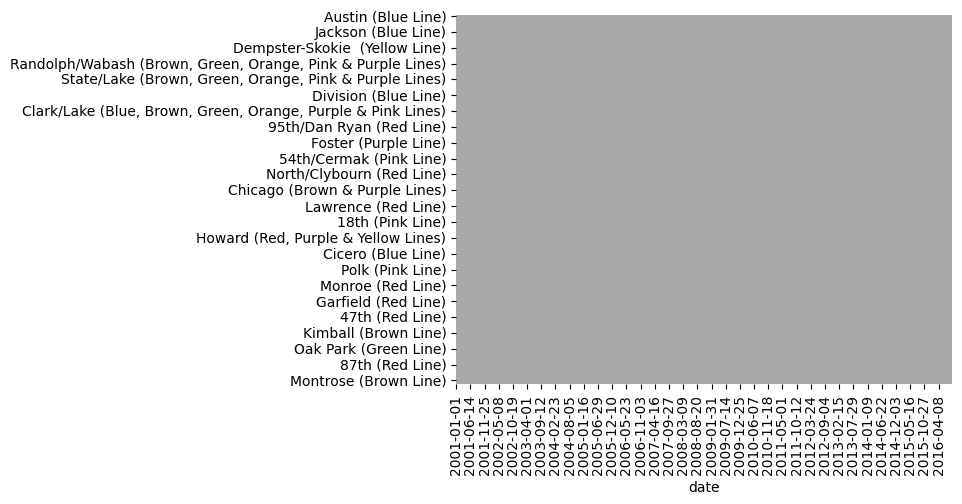

In [203]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")

chicago_raw_nona = chicago_raw.dropna(
    axis='columns',
    thresh=5733-30
)

chicago_raw_nona = pd.DataFrame(
    knn_imputer.fit_transform(chicago_raw_nona),
    columns = chicago_raw_nona.columns,
    index=chicago_raw_nona.index
)
sns.heatmap(
    chicago_raw_nona.isna().T,
    cbar=False,
    cmap=cmap,
    #linewidths=0.5
)


<Axes: xlabel='date'>

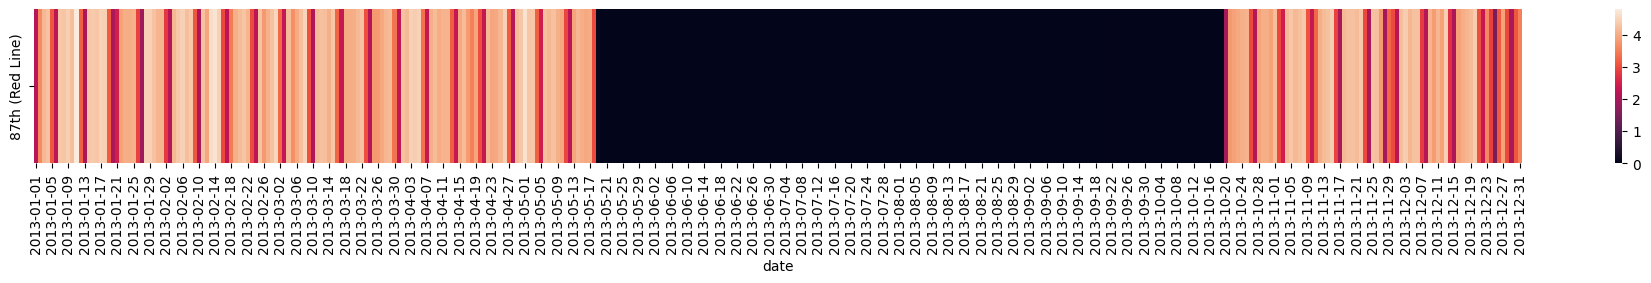

In [204]:
plt.figure(figsize=(24, 2))

sns.heatmap(
    pd.DataFrame(chicago_raw_nona.loc['2013-01-01':'2013-12-31', '87th (Red Line)']).T
)

Imputing with trees

In [57]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(
    n_estimators=4,
    max_depth=10,
    bootstrap=True
)
iterative_imputer = IterativeImputer(max_iter=2)



/Users/timoschurg/Nextcloud/feature_engineering/code/.venv/lib/python3.11/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


<Axes: xlabel='date'>

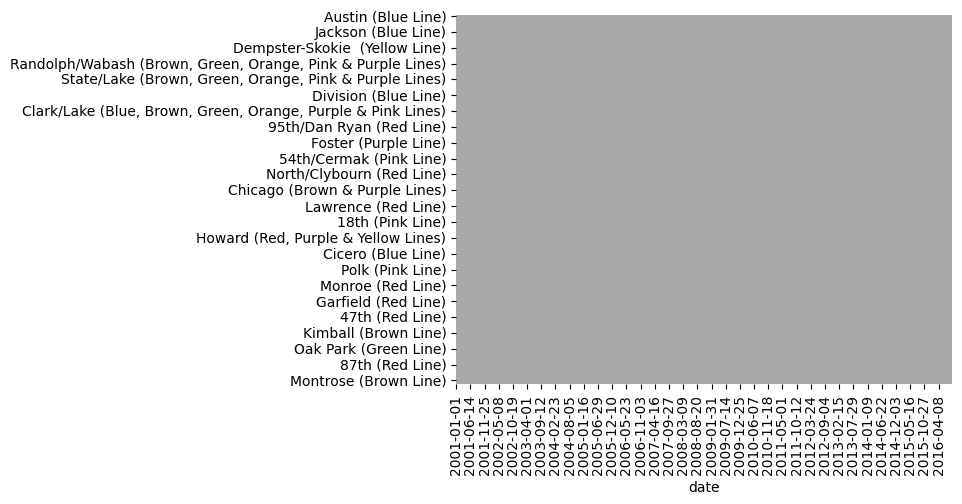

In [58]:
chicago_raw_nona = chicago_raw.dropna(
    axis='columns',
    thresh=5733-30
)

chicago_raw_nona = pd.DataFrame(
    iterative_imputer.fit_transform(chicago_raw_nona),
    columns = chicago_raw_nona.columns,
    index=chicago_raw_nona.index
)
sns.heatmap(
    chicago_raw_nona.isna().T,
    cbar=False,
    cmap=cmap,
    #linewidths=0.5
)

<Axes: xlabel='date'>

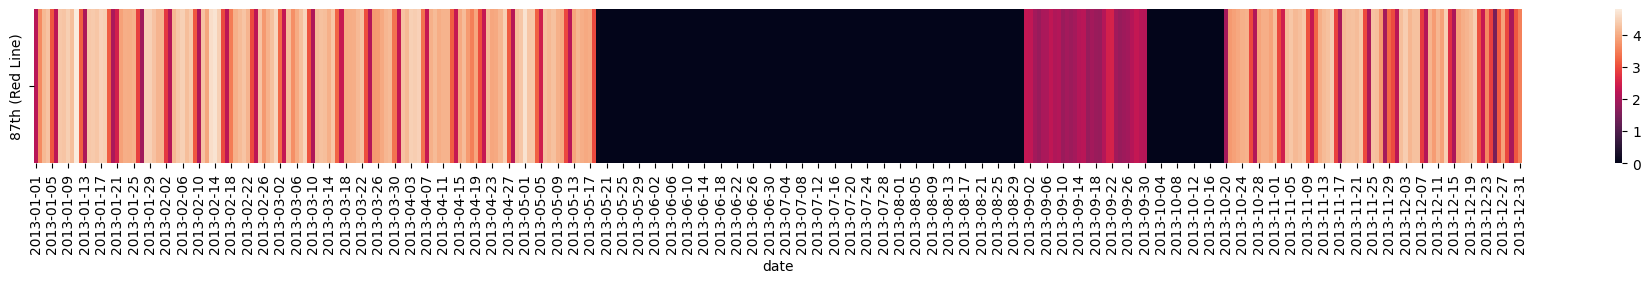

In [207]:
plt.figure(figsize=(24, 2))

sns.heatmap(
    pd.DataFrame(chicago_raw_nona.loc['2013-01-01':'2013-12-31', '87th (Red Line)']).T
)

Lineare Modelle fuer Imputation

<Axes: xlabel='79th (Red Line)', ylabel='79th (Red Line)'>

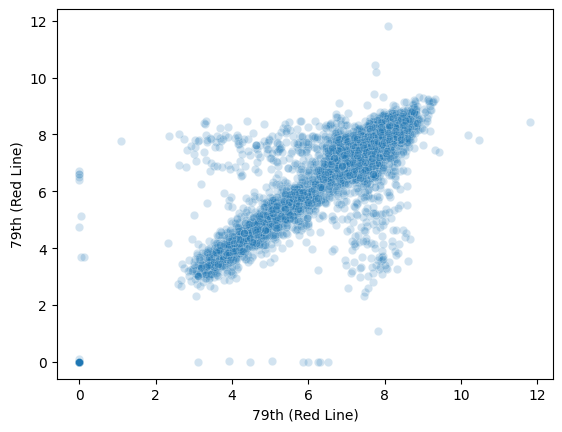

In [208]:
from seaborn import scatterplot
scatterplot(
    x=chicago_raw['79th (Red Line)'],
    y=chicago_raw['79th (Red Line)'].shift(7),
    alpha=0.2
)

In [209]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
X = chicago_raw[['79th (Red Line)']].dropna()
y = X['79th (Red Line)'].shift(7)
lin_reg.fit(
    X=X.iloc[7:,:],
    y=y[7:]
)

LinearRegression()